<a href="https://colab.research.google.com/github/Huwalli/PLta/blob/main/%E3%80%8C%E7%AC%AC%E5%8D%81%E4%B8%80%E9%80%B1_%E5%9C%96%E5%83%8F%E8%AD%98%E5%88%A5%E5%85%A5%E9%96%80_Part1_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 🧠 導入必要的庫
import tensorflow as tf  # TensorFlow 是一個用來建構深度學習模型的工具箱
from tensorflow.keras import layers, models  # 從 Keras 拿出我們會用到的「層」和「模型」(Keras 是一個用來快速建立與訓練神經網路模型的高階深度學習函式庫)
import matplotlib.pyplot as plt  # 畫圖用的工具

# 📦 載入 MNIST 手寫數字資料集（70,000 張 28x28 像素的黑白圖片）
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ✨ 標準化：將每個像素值從 0~255 壓縮到 0~1，讓模型更容易學習(全部除以255像素最大值)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 🔧 調整資料形狀（加入一個「灰階通道」的維度，符合 CNN 的輸入格式）
# 原本是 (60000, 28, 28)，變成 (60000, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 🧱 建立 CNN 模型
model = models.Sequential([

    # 👀 第 1 層卷積層：16 個 3x3 濾鏡，負責「找出邊緣、角落等特徵」
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # 🏊‍♀️ 池化層：將圖片縮小一半，保留重要資訊
    layers.MaxPooling2D((2, 2)),

    # 🔍 第 2 層卷積：更深一層的特徵提取
    layers.Conv2D(32, (3, 3), activation='relu'),

    # 🏊‍♂️ 再次池化
    layers.MaxPooling2D((2, 2)),

    # 🧠 第 3 層卷積：讓電腦可以看出更複雜的圖形（例如「整個數字的形狀」）
    layers.Conv2D(32, (3, 3), activation='relu'),

    # 📄 拉平：把多維圖片展平成一條長長的向量，才能接全連接層
    layers.Flatten(),

    # 🧠 全連接層：像人腦一樣做出判斷，這裡有 32 個「神經元」
    layers.Dense(32, activation='relu'),

    # 🔟 最後的輸出層：10 個數字（0~9）各自的機率
    layers.Dense(10, activation='softmax')
])

# 🧪 編譯模型：設定學習方式（adam 是一種優化器）
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 用來算「預測錯誤的程度」
              metrics=['accuracy'])  # 顯示準確率

# 🚀 開始訓練模型（用訓練資料 x_train 和 y_train，跑 5 回合）
# validation_split=0.1 表示拿出 10% 當作驗證資料，觀察模型是否過擬合
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 📊 測試模型準確率（用沒看過的測試資料來驗收）
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')  # 印出最終準確率（例如 0.9852 = 98.52%）


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8474 - loss: 0.5032 - val_accuracy: 0.9845 - val_loss: 0.0548
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9870 - val_loss: 0.0463
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9898 - val_loss: 0.0364
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9893 - loss: 0.0325 - val_accuracy: 0.9905 - val_loss: 0.0353
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9885 - val_loss: 0.0444
313/313 - 1s - 3ms/step - accuracy: 0.9861 - loss: 0.0388
Test accuracy: 0.9861


做完了訓練模型，來把正確率的圖表畫出來

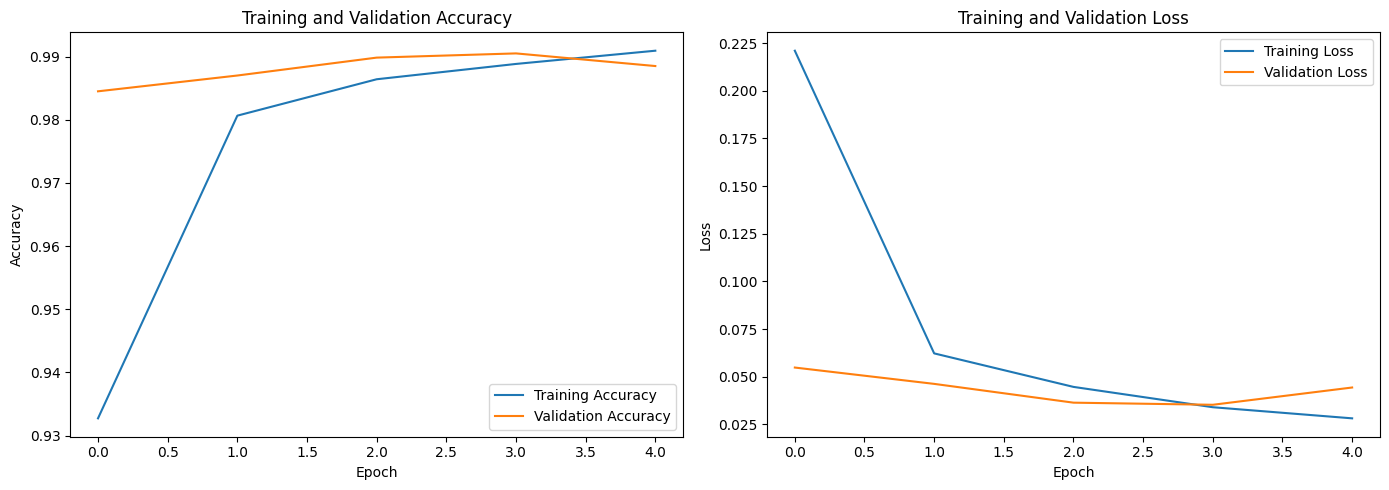

In [11]:
# 📏 調整整張圖表的大小（單位是英吋）
plt.figure(figsize=(14, 5))  # 寬 14，高 5，讓圖表不擠在一起

# 📈 繪製準確率的折線圖（左邊）
plt.subplot(1, 2, 1)  # 把畫面分成 1 列 2 欄，這是第 1 個圖（左）
plt.plot(history.history['accuracy'], label='Training Accuracy')  # 訓練準確率
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # 驗證準確率
plt.xlabel('Epoch')  # X 軸標題：訓練輪數
plt.ylabel('Accuracy')  # Y 軸標題：準確率
plt.legend(loc='lower right')  # 圖例顯示在右下角
plt.title('Training and Validation Accuracy')  # 標題：訓練與驗證準確率

# 📉 繪製損失的折線圖（右邊）
plt.subplot(1, 2, 2)  # 這是第 2 個圖（右）
plt.plot(history.history['loss'], label='Training Loss')  # 訓練損失
plt.plot(history.history['val_loss'], label='Validation Loss')  # 驗證損失
plt.xlabel('Epoch')  # X 軸標題：訓練輪數
plt.ylabel('Loss')  # Y 軸標題：損失
plt.legend(loc='upper right')  # 圖例顯示在右上角
plt.title('Training and Validation Loss')  # 標題：訓練與驗證損失

# 🧩 自動調整子圖之間的距離，避免重疊
plt.tight_layout()

# 🎨 顯示圖表
plt.show()


In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,880 (276.88 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,254 (184.59 KB)